In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import colorsys
from io import StringIO

from ema_workbench.analysis.plotting_util import *
from ema_workbench.analysis.plotting import *
from ema_workbench.analysis import pairs_plotting
from ema_workbench.analysis import feature_scoring
from ema_workbench.analysis import RuleInductionType
import ema_workbench.analysis.prim as prim
from ema_workbench.analysis import plotting_util
from ema_workbench import ema_logging
from functools import reduce

# Graphs

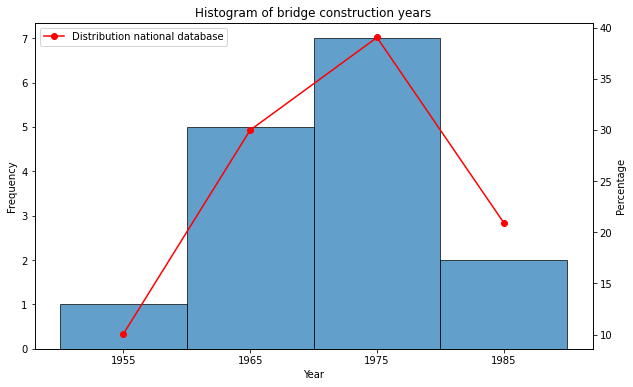

In [24]:
# Your data
data = [1970, 1970, 1960, 1970, 1970, 1960, 1980, 1980, 1970, 1960, 1970, 1970, 1950, 1960, 1960]

# Specify bin edges
bin_edges = [1950, 1960, 1970, 1980, 1990]  # Add more edges if needed

# Create a histogram with specified bin edges
hist, bin_edges, _ = plt.hist(data, bins=bin_edges, edgecolor='black', align='mid', alpha=0.7, label='Histogram')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Histogram of bridge construction years')

# Calculate midpoints of the bin edges
bin_midpoints = [(bin_edges[i] + bin_edges[i + 1]) / 2 for i in range(len(bin_edges) - 1)]

# Set x-axis ticks to the midpoints of the bins
plt.xticks(bin_midpoints)

# Create a secondary y-axis for the line plot
ax2 = plt.gca().twinx()

# Values for the line plot
line_data_midpoints = [1955, 1965, 1975, 1985]  # Midpoints of the bins
line_counts = [50, 149, 194, 104]
line_density = [10.0603622, 29.9798793, 39.0342052, 20.9255533]

# Plot the line on the secondary y-axis
ax2.plot(line_data_midpoints, line_density, marker='o', linestyle='-', color='red', label='Distribution national database')
ax2.set_ylabel('Percentage')

# Show legends
plt.legend(loc='best')
ax2.legend(loc='upper left')

plt.gcf().set_size_inches(10, 6)

# Show the plot
plt.show()


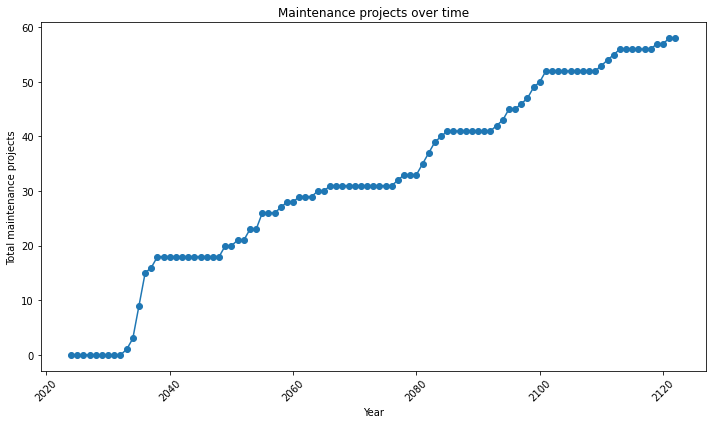

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO

# Your data
data = """DateTime Totaal_versterkingsprojecten
2024 0
2025 0
2026 0
2027 0
2028 0
2029 0
2030 0
2031 0
2032 0
2033 1
2034 3
2035 9
2036 15
2037 16
2038 18
2039 18
2040 18
2041 18
2042 18
2043 18
2044 18
2045 18
2046 18
2047 18
2048 18
2049 20
2050 20
2051 21
2052 21
2053 23
2054 23
2055 26
2056 26
2057 26
2058 27
2059 28
2060 28
2061 29
2062 29
2063 29
2064 30
2065 30
2066 31
2067 31
2068 31
2069 31
2070 31
2071 31
2072 31
2073 31
2074 31
2075 31
2076 31
2077 32
2078 33
2079 33
2080 33
2081 35
2082 37
2083 39
2084 40
2085 41
2086 41
2087 41
2088 41
2089 41
2090 41
2091 41
2092 41
2093 42
2094 43
2095 45
2096 45
2097 46
2098 47
2099 49
2100 50
2101 52
2102 52
2103 52
2104 52
2105 52
2106 52
2107 52
2108 52
2109 52
2110 53
2111 54
2112 55
2113 56
2114 56
2115 56
2116 56
2117 56
2118 56
2119 57
2120 57
2121 58
2122 58"""

# Read data into a DataFrame
df = pd.read_csv(StringIO(data), delimiter='\s+')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['DateTime'], df['Totaal_versterkingsprojecten'], marker='o', label='Totaal_versterkingsprojecten')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Total maintenance projects')
plt.title('Maintenance projects over time')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Prepare Ventity data

In [3]:
def import_results(path):
    # Collect all the files in the directory path that end with .csv
    csv_files = [file for file in os.listdir(path) if file.endswith('.csv')]

    # Create a dictionairy to group the files with same policy
    file_sets_dict = {}

    # Group files with same policy based on the text before the first underscore
    for csv_file in csv_files:
        base_name = os.path.basename(csv_file)
        prefix = base_name.split('_')[0]

        if prefix not in file_sets_dict:
            file_sets_dict[prefix] = []

        file_sets_dict[prefix].append(base_name)

    # Display the dictionary as a list of lists
    file_sets = list(file_sets_dict.values())
    
    return file_sets

In [16]:
# Specify your directory path
directory_path = os.getcwd() + "\\revisedGC5k\\"

file_sets = import_results(directory_path)
file_sets

[['CTC_collection_of_brug.csv',
  'CTC_collection_of_regioregio.csv',
  'CTC_collection_of_weg.csv',
  'CTC_instellingen.csv',
  'CTC_model.csv',
  'CTC_type_onderdeel.csv',
  'CTC_verkeer.csv'],
 ['CYC_collection_of_brug.csv',
  'CYC_collection_of_regioregio.csv',
  'CYC_collection_of_weg.csv',
  'CYC_instellingen.csv',
  'CYC_model.csv',
  'CYC_type_onderdeel.csv',
  'CYC_verkeer.csv'],
 ['GC big_collection_of_brug.csv',
  'GC big_collection_of_regioregio.csv',
  'GC big_collection_of_weg.csv',
  'GC big_instellingen.csv',
  'GC big_model.csv',
  'GC big_type_onderdeel.csv',
  'GC big_verkeer.csv'],
 ['GC small_collection_of_brug.csv',
  'GC small_collection_of_regioregio.csv',
  'GC small_collection_of_weg.csv',
  'GC small_instellingen.csv',
  'GC small_model.csv',
  'GC small_type_onderdeel.csv',
  'GC small_verkeer.csv'],
 ['GC_collection_of_brug.csv',
  'GC_collection_of_regioregio.csv',
  'GC_collection_of_weg.csv',
  'GC_instellingen.csv',
  'GC_model.csv',
  'GC_type_onderdee

In [5]:
def prepare_results(path, file_sets):
    # Create a list that will contain all results of entitytypes and policies
    all_dfs = []

    # Loop through each policy file set
    for file_set in file_sets:
        dfs_per_policy = []
        last_df = None
        
        # Loop through each entitytype per policy file set
        for file_name in file_set:
            # Read and store .csv files
            file_path = os.path.join(path, file_name)
            df = pd.read_csv(file_path, header=1)

            # Replace potential NaN values in EntityID column 
            if 'Entity ID' in df.columns and df.loc[:, 'Entity ID'].isna().any():
                parts_after_underscore = file_name.split('_')[1:]
                entitytype_name = '_'.join(parts_after_underscore).split('.')[0]
                df['Entity ID'] = df['Entity ID'].fillna(entitytype_name)

            # Create column with policy name
            policy_name = file_name.split('_')[0]
            df['Policy'] = policy_name

            # Get unique 'Entity ID' values
            entity_IDs = df['Entity ID'].value_counts().index

            # Create an empty DataFrame with 'Run' and 'DateTime'
            new_df = pd.DataFrame({'Run': df['Run'], 'DateTime': df['DateTime'], 'Policy': df['Policy']})

            # Loop through unique 'Entity ID' values
            for entity_ID in entity_IDs:
                # Select rows for the current 'Entity ID'
                entity_df = df[df['Entity ID'] == entity_ID].copy()

                # Rename columns by adding 'Entity ID' as a suffix
                entity_df.columns = [f'{col} {entity_ID}' if col not in ['Run', 'DateTime', 'Policy'] 
                                     else col for col in entity_df.columns]

                # Merge on 'Run' and 'DateTime'
                new_df = pd.merge(new_df, entity_df, left_on=['Run', 'DateTime', 'Policy'], 
                                  right_on=['Run', 'DateTime', 'Policy'], how='left').drop_duplicates()
                
            # Merge new_df with previous df in loop and store the merged df as previous df
            if last_df is None:
                last_df = new_df
            else:
                last_df = pd.merge(last_df, new_df, on=['Run','DateTime', 'Policy'], how='left')


        all_dfs.append(last_df)

    # Merge into one dataframe
    final_df = pd.concat(all_dfs, ignore_index=True)
    
    # Create a Scenario column
    final_df['scenario'] = (final_df['Run'] != final_df['Run'].shift()).cumsum()
    
    return final_df

In [17]:
# run the prepare_results function and change the DateTime column to TIME

prepared_df = prepare_results(directory_path, file_sets)
prepared_df = prepared_df.rename(columns={'DateTime':'TIME'})

In [ ]:
# Select policies

selected_policies = ['CYC', 'CTC', 'GC small', 'GC big', 'NC']
filtered_df = prepared_df[prepared_df['Policy'].isin(selected_policies)]

## Create EMA_workbench format

In [7]:
def create_experimental_data(prepared_df,parameters,outcomes):
    # Create dataframe with uncertainties and policy
    df_poi = prepared_df[parameters]
    df_poi = df_poi[~df_poi.duplicated(subset=parameters, keep='first')].reset_index(drop=True)
    
    # Create dictionary with outcomes
    dict_ooi = {}

    # Put time series data in dictionary as value with outcome as key
    for col in outcomes:
        grouped_data = prepared_df.groupby('scenario')[col].apply(list).to_dict()
        dict_ooi[col] = np.array(list(grouped_data.values()))

    return df_poi, dict_ooi

In [8]:
# Display all columns in alphabetical order for easy access in the cell below
for col in sorted(prepared_df.columns):
    print(col)

Average Draagcapaciteit collection_of_brug
Brug trigger Centraal|B|E|BE
Brug trigger Centraal|B|F|BF
Brug trigger Centraal|B|G|BG
Brug trigger Centraal|E|B|EB
Brug trigger Centraal|E|G|EG
Brug trigger Centraal|F|B|FB
Brug trigger Centraal|F|G|FG
Brug trigger Centraal|G|B|GB
Brug trigger Centraal|G|E|GE
Brug trigger Centraal|G|F|GF
Brug trigger Noord|C|E|CE
Brug trigger Noord|C|M|CM
Brug trigger Noord|E|C|EC
Brug trigger Noord|E|H|EH
Brug trigger Noord|E|L|EL
Brug trigger Noord|E|M|EM
Brug trigger Noord|H|E|HE
Brug trigger Noord|H|L|HL
Brug trigger Noord|L|E|LE
Brug trigger Noord|L|H|LH
Brug trigger Noord|L|M|LM
Brug trigger Noord|M|C|MC
Brug trigger Noord|M|E|ME
Brug trigger Noord|M|L|ML
Brug trigger Oost|G|H|GH
Brug trigger Oost|G|I|GI
Brug trigger Oost|G|J|GJ
Brug trigger Oost|H|G|HG
Brug trigger Oost|H|I|HI
Brug trigger Oost|I|G|IG
Brug trigger Oost|I|H|IH
Brug trigger Oost|I|J|IJ
Brug trigger Oost|J|G|JG
Brug trigger Oost|J|I|JI
Brug trigger West|A|B|AB
Brug trigger West|A|C|AC
Bru

In [18]:
# Specify parameters of interest
uncertainties = ['Factor historische jaarlijkse conditieverslechtering Constructie',
                 'Factor historische jaarlijkse conditieverslechtering W en E',
                 'Factor historische jaarlijkse vermindering herstel conditie Constructie',
                 'Factor historische jaarlijkse vermindering herstel conditie W en E',
                 'Factor veroudering Constructie',
                 'Factor veroudering W en E',
                 'Groei per regio instellingen',
                 'Jaarlijkse groei verkeersintensiteit verkeer', 
                 'Jaarlijkse groei voertuiggewicht verkeer',
                 'Gemiddelde voertuigsnelheid verkeer',
                 'veiligheidsmarge belasting op brug instellingen',
                 'periode versterken constructie instellingen',
                 #'forecast average time instellingen',
                 'Periodiek onderhoud Sensitivity trigger instellingen',
                 #'Periodiek versterken Sensitivity trigger instellingen'
                 ]

levers = []

# If multiple policy file sets exist, append the policy column
if 'Policy' in prepared_df.columns: 
    poi = uncertainties + levers + ['Policy']

# Specify outcomes of interest
ooi = ['Sum Totale reistijd collection_of_weg' , 'Totaal projecten collection_of_brug',
       'Average Draagcapaciteit collection_of_brug', 'Verandering in capaciteitsbezetting collection_of_brug',
       'Min Bereikbaarheid collection_of_regioregio', 'TIME'
       ] 

In [19]:
# create experiments DataFrame and outcome dictionary

x,o = create_experimental_data(prepared_df,poi,ooi)

# Test

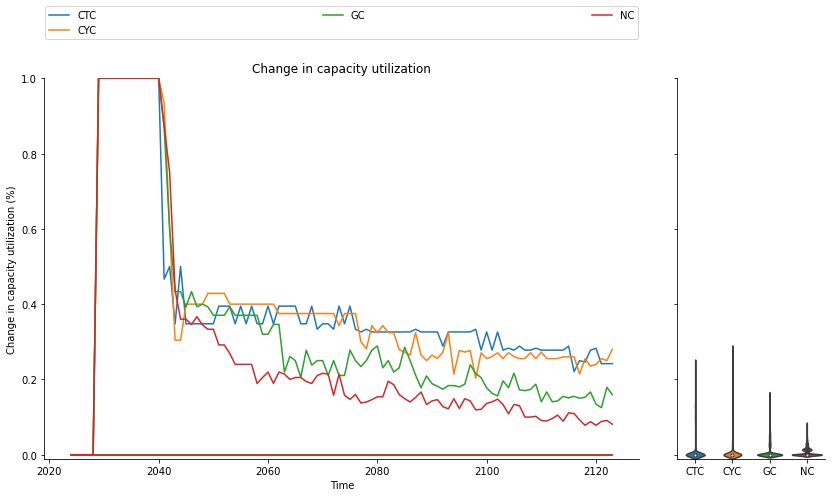

In [50]:
# Create envelope graph
fig, axes = envelopes(x, o, outcomes_to_show=['Verandering in capaciteitsbezetting collection_of_brug'],
                  titles={'Verandering in capaciteitsbezetting collection_of_brug': 'Change in capacity utilization'},
                  ylabels={'Verandering in capaciteitsbezetting collection_of_brug': 'Change in capacity utilization (%)'},
                  group_by='Policy', legend=True, density=Density.VIOLIN, fill=False)

# set size
fig = plt.gcf()
fig.set_size_inches(14,7)
ax = fig.get_axes()

# change transparency of the lines in the graph by changing the value in line.set_alpha
# set axis margins
for axis in ax:
    for line in axis.get_lines():
        line.set_alpha(1)
    axis.margins(y=0)
sns.despine()

# show plot
plt.show()

singular matrix
C:\Users\Noah\anaconda3\lib\site-packages\ema_workbench\analysis\plotting_util.py:372: RuntimeWarning: invalid value encountered in true_divide
  kde_x = kde_x / np.max(kde_x)
singular matrix
singular matrix
singular matrix
singular matrix
singular matrix
singular matrix
singular matrix
singular matrix
singular matrix
singular matrix
singular matrix
singular matrix
singular matrix
singular matrix
singular matrix
singular matrix
singular matrix
singular matrix
singular matrix
singular matrix
singular matrix
singular matrix
singular matrix
singular matrix
singular matrix
singular matrix
singular matrix
singular matrix
singular matrix
singular matrix
singular matrix
singular matrix
singular matrix
singular matrix
singular matrix
singular matrix
singular matrix
singular matrix
singular matrix
singular matrix
singular matrix


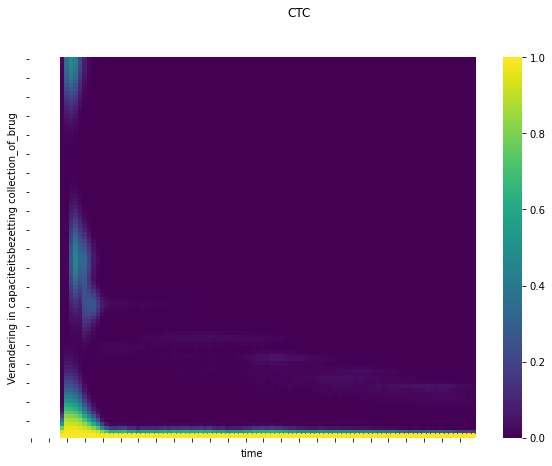

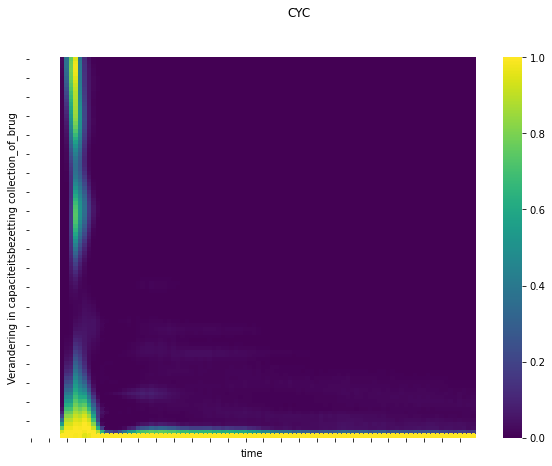

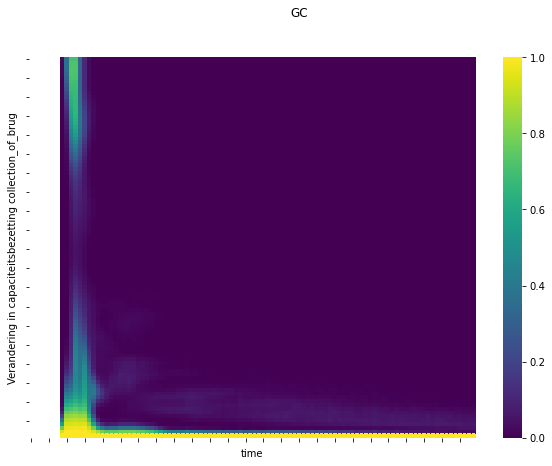

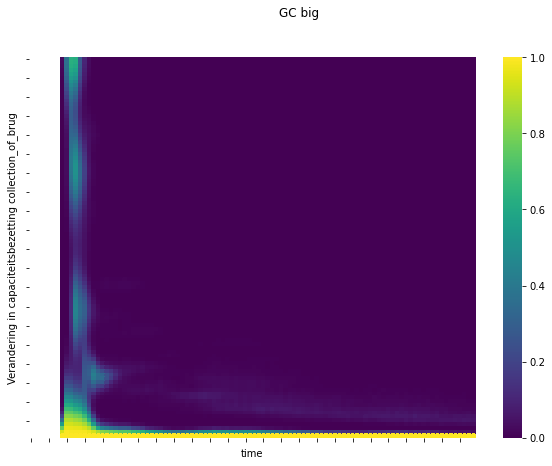

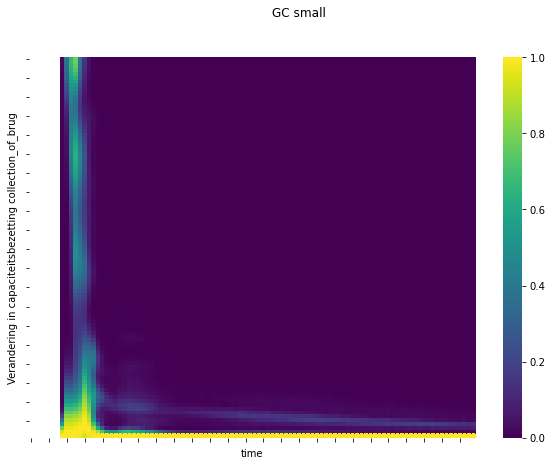

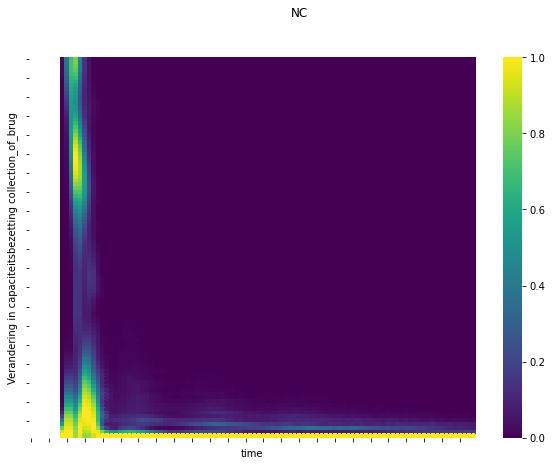

In [26]:
# create a heatmap
fig, axes = kde_over_time(x, o, outcomes_to_show=['Verandering in capaciteitsbezetting collection_of_brug'],
                          group_by='Policy', log=False, colormap='viridis')

# set size
for figure in fig:
    figure.set_size_inches(10,7)

log option ignored for violin plot
log option ignored for violin plot
log option ignored for violin plot
log option ignored for violin plot
log option ignored for violin plot
log option ignored for violin plot


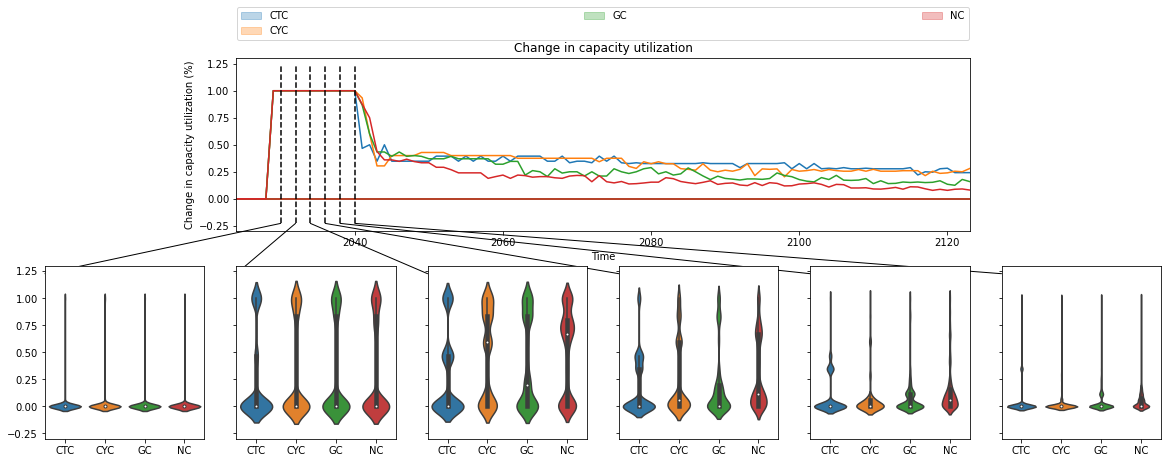

In [88]:
# create an envelope plot with multiple density plots, for the years specified in points_of_time

multiple_densities(
        x,
        o ,outcomes_to_show=['Verandering in capaciteitsbezetting collection_of_brug'],
        log=True,
        points_in_time=[2030,2032,2034,2036,2038,2040],
        titles={'Verandering in capaciteitsbezetting collection_of_brug': 'Change in capacity utilization'},
        ylabels={'Verandering in capaciteitsbezetting collection_of_brug': 'Change in capacity utilization (%)'},
        group_by="Policy", 
        density=Density.VIOLIN,
        fill=False
        )

# set size
fig = plt.gcf()
fig.set_size_inches(20,7)

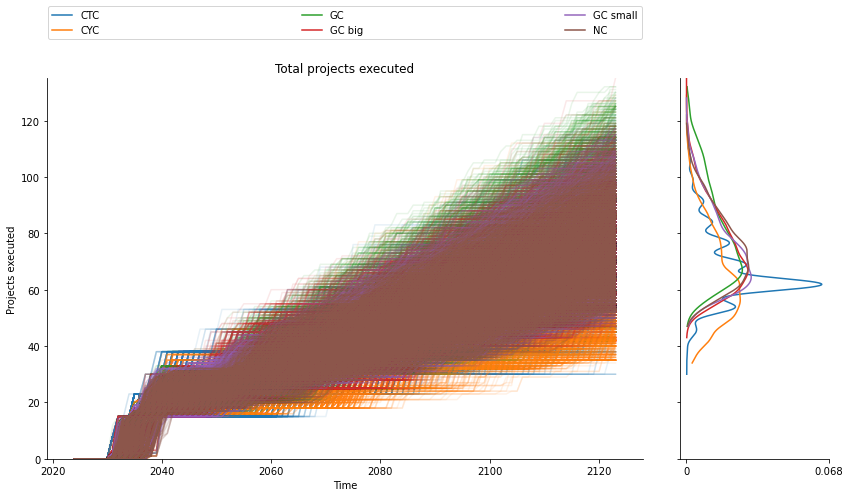

In [27]:
# create a line graph
fig, axes = lines(x,o,outcomes_to_show=['Totaal projecten collection_of_brug'],group_by = 'Policy',
                  titles= {'Totaal projecten collection_of_brug':'Total projects executed'},
                  ylabels={'Totaal projecten collection_of_brug':'Projects executed'},
                  legend=True, density=Density.KDE)

# set size
fig = plt.gcf()
fig.set_size_inches(14,7)
ax = fig.get_axes()

# change transparency of the lines in the graph by changing the value in line.set_alpha
# set margins for the plot area
for axis in ax:
    for line in ax[0].get_lines():
        line.set_alpha(0.1)
    axis.margins(y=0)
sns.despine()

# show plot
plt.show()

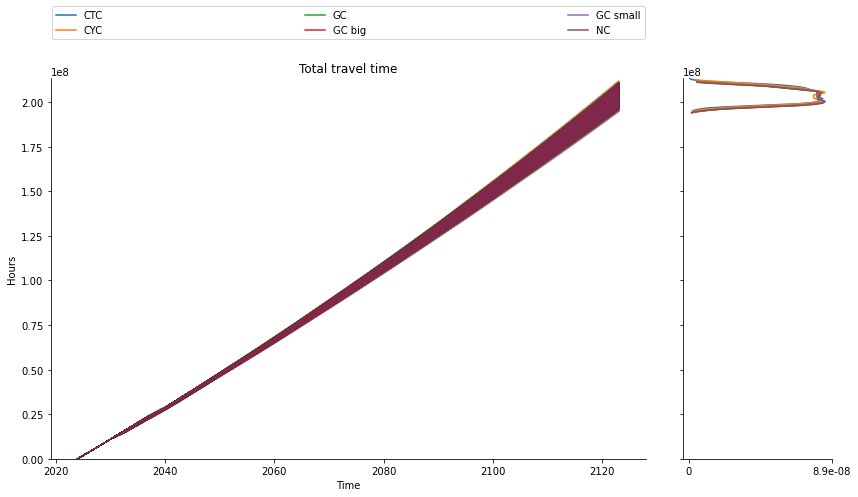

In [25]:
# create line plot
fig, axes = lines(x,o,outcomes_to_show=['Sum Totale reistijd collection_of_weg'],group_by = 'Policy',
                  titles= {'Sum Totale reistijd collection_of_weg':'Total travel time'},
                  ylabels={'Sum Totale reistijd collection_of_weg':'Hours'},
                  legend=True, density=Density.KDE)

# set size
fig = plt.gcf()
fig.set_size_inches(14,7)
ax = fig.get_axes()

# change transparency of the lines in the graph by changing the value in line.set_alpha
# set margins for the plot area
for axis in ax:
    for line in ax[0].get_lines():
        line.set_alpha(0.01)
    axis.margins(y=0)
sns.despine()

# show plot
plt.show()

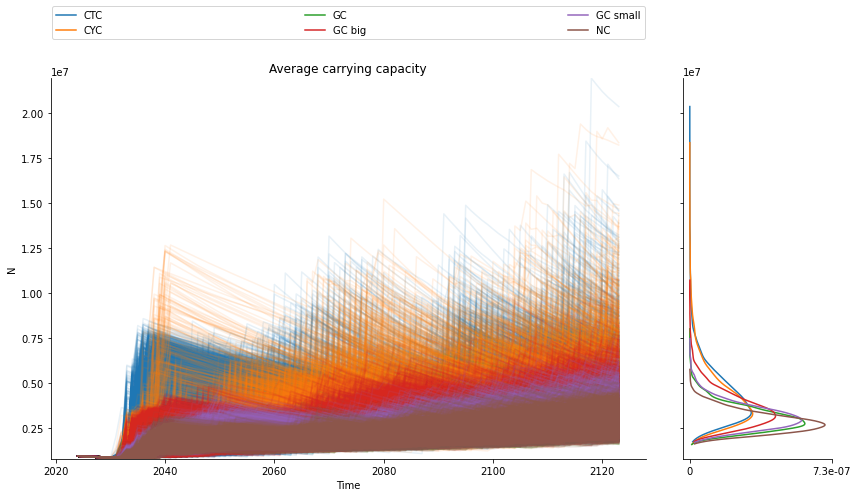

In [29]:
# create line plot
fig, axes = lines(x,o,outcomes_to_show=['Average Draagcapaciteit collection_of_brug'],group_by = 'Policy',
                  titles= {'Average Draagcapaciteit collection_of_brug':'Average carrying capacity'},
                  ylabels={'Average Draagcapaciteit collection_of_brug':'N'},
                  legend=True, density=Density.KDE)

# set size
fig = plt.gcf()
fig.set_size_inches(14,7)
ax = fig.get_axes()

# change transparency of the lines in the graph by changing the value in line.set_alpha
# set margins for the plot area
for axis in ax:
    for line in ax[0].get_lines():
        line.set_alpha(0.1)
    axis.margins(y=0)
sns.despine()

# show plot
plt.show()

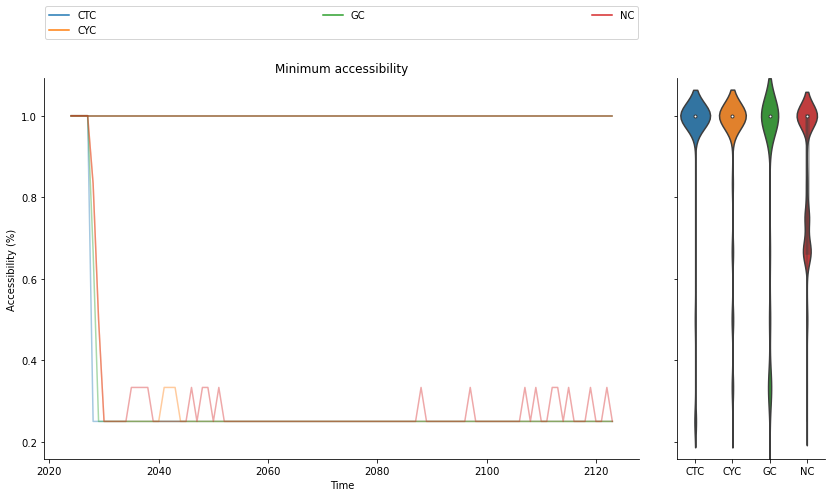

In [57]:
# create envelope plot
fig, axes = envelopes(x,o,outcomes_to_show=['Min Bereikbaarheid collection_of_regioregio'],group_by = 'Policy',
                  titles= {'Min Bereikbaarheid collection_of_regioregio':'Minimum accessibility'},
                  ylabels={'Min Bereikbaarheid collection_of_regioregio':'Accessibility (%)'},
                  legend=True, density=Density.VIOLIN)

# set size
fig = plt.gcf()
fig.set_size_inches(14,7)
ax = fig.get_axes()

# change transparency of the lines in the graph by changing the value in line.set_alpha
# set margins for the plot area
for axis in ax:
    for line in axis.get_lines():
        line.set_alpha(0.4)
    axis.margins(y=0)
sns.despine()

# show plot
plt.show()

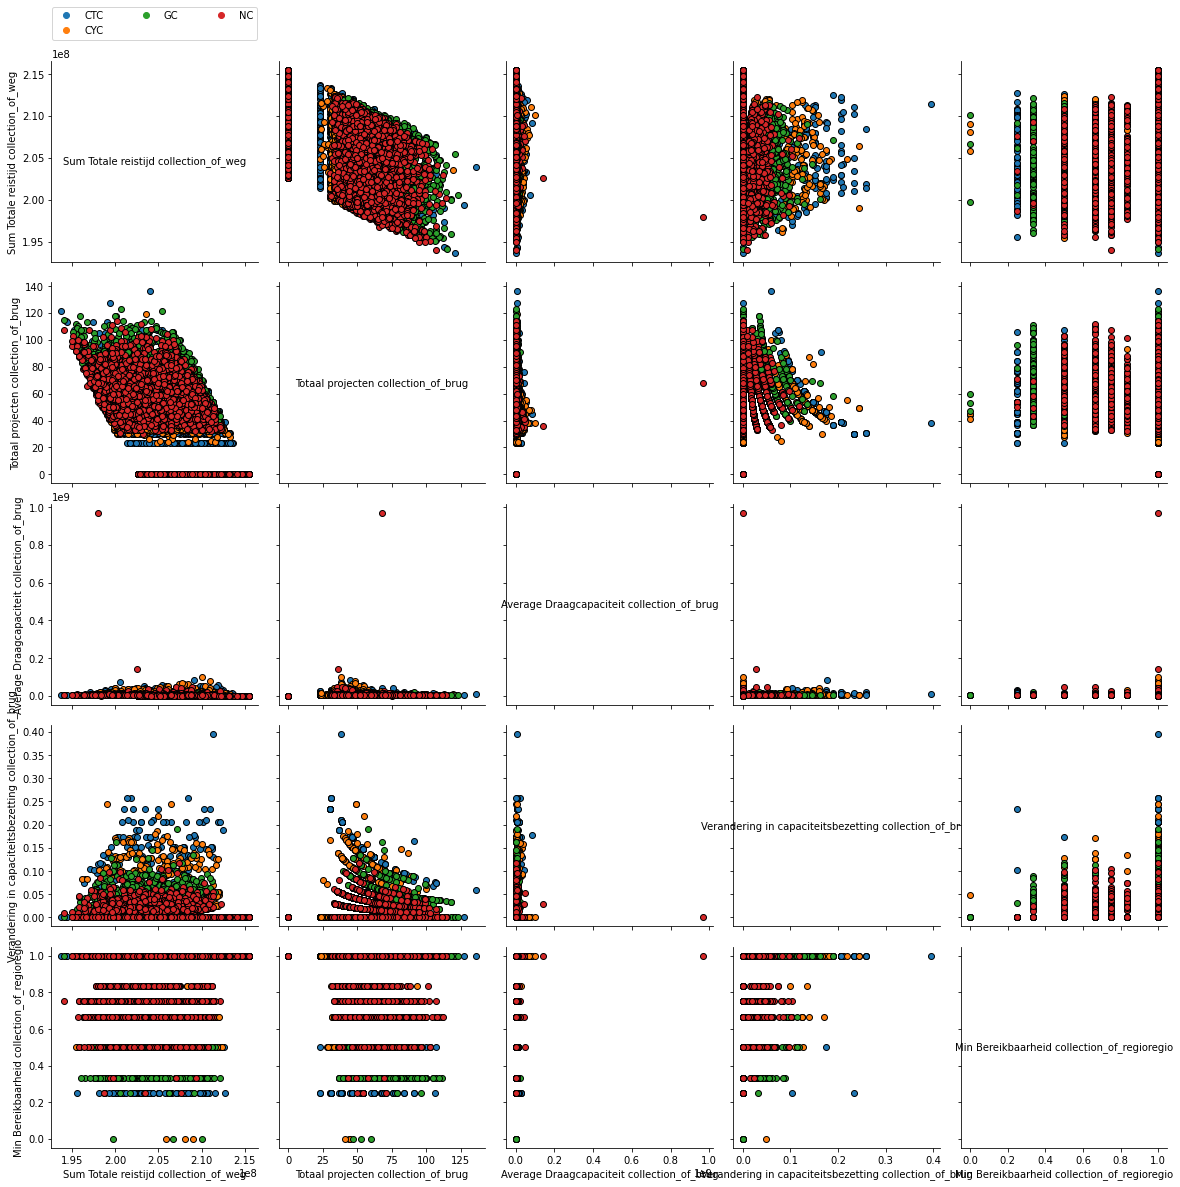

In [54]:
# create pairs plot
fig, axes = pairs_plotting.pairs_scatter(x, o, group_by='Policy', 
                                         legend=True)
# set size
fig.set_size_inches(20,20)
plt.show()

# PRIM

In [30]:
# Create a dictionary with only the last values of each of the outcomes
o_last = {}
for i in o.keys():
    o_last[i] = [j[-1] for j in o[i]]

[MainProcess/INFO] 30000 points remaining, containing 5120 cases of interest
[MainProcess/INFO] mean: 0.8480204342273308, mass: 0.0522, coverage: 0.259375, density: 0.8480204342273308 restricted_dimensions: 2


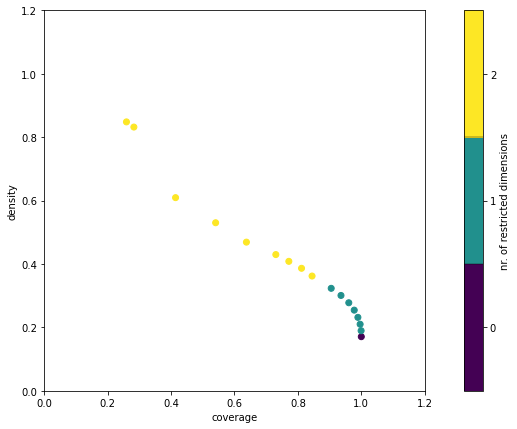

In [222]:
# PRIM Analysis
ema_logging.log_to_stderr(ema_logging.INFO);  
# Define dependent variable and selection criteria
y = np.array([value < 60 for value in o_last['Totaal projecten collection_of_brug']])

# Run the PRIM algorithm
prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
box1 = prim_alg.find_box()
box1.show_tradeoff()

fig = plt.gcf()
fig.set_size_inches(14,7)

coverage    0.282813
density     0.831706
id                15
mass        0.058033
mean        0.831706
res_dim            2
Name: 15, dtype: object

                                                box 15             \
                                                   min        max   
Policy                                           {CYC}      {CYC}   
periode versterken constructie instellingen  23.037262  29.997212   

                                                                              
                                                                   qp values  
Policy                                                  [5.77963e-319, -1.0]  
periode versterken constructie instellingen  [1.0358520938189231e-274, -1.0]  



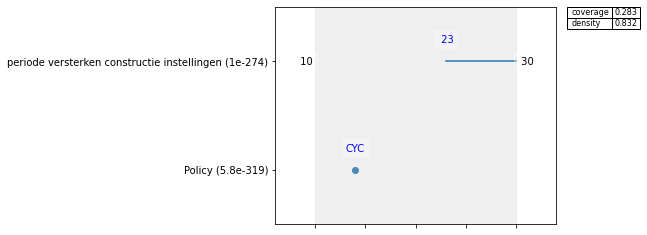

In [188]:
# specify box of interest
boi = 15

box1.inspect(boi)
box1.inspect(boi, style='graph')
plt.show()

[MainProcess/INFO] 30000 points remaining, containing 7991 cases of interest
[MainProcess/INFO] mean: 0.8234939759036145, mass: 0.05533333333333333, coverage: 0.1710674508822425, density: 0.8234939759036145 restricted_dimensions: 4


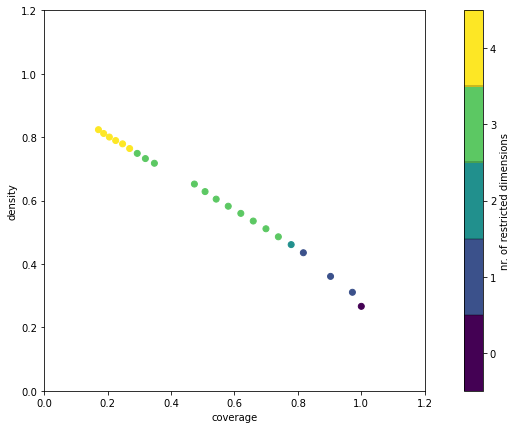

In [206]:
# Define dependent variable and selection criteria
y = np.array([value > 0.4e7 for value in o_last['Average Draagcapaciteit collection_of_brug']])

# Run the PRIM algorithm
prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
box1 = prim_alg.find_box()
box1.show_tradeoff()

fig = plt.gcf()
fig.set_size_inches(14,7)

coverage    0.205481
density     0.800195
id                19
mass          0.0684
mean        0.800195
res_dim            4
Name: 19, dtype: object

                                                 box 19              \
                                                    min         max   
Policy                                       {CTC, CYC}  {CTC, CYC}   
Jaarlijkse groei voertuiggewicht verkeer        0.60424    0.799977   
Gemiddelde voertuigsnelheid verkeer           78.896851   99.992264   
periode versterken constructie instellingen   11.772358   29.997212   

                                                                              
                                                                   qp values  
Policy                                       [5.4325065374435545e-139, -1.0]  
Jaarlijkse groei voertuiggewicht verkeer       [2.091016987436419e-51, -1.0]  
Gemiddelde voertuigsnelheid verkeer           [1.8345418858556047e-44, -1.0]  
periode versterken construc

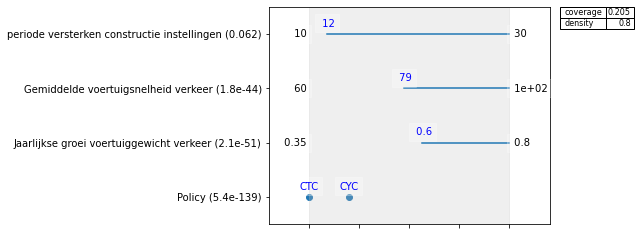

In [207]:
# specify box of interest
boi2 = 19

box1.inspect(boi2)
box1.inspect(boi2, style='graph')
plt.show()

# Feature scoring

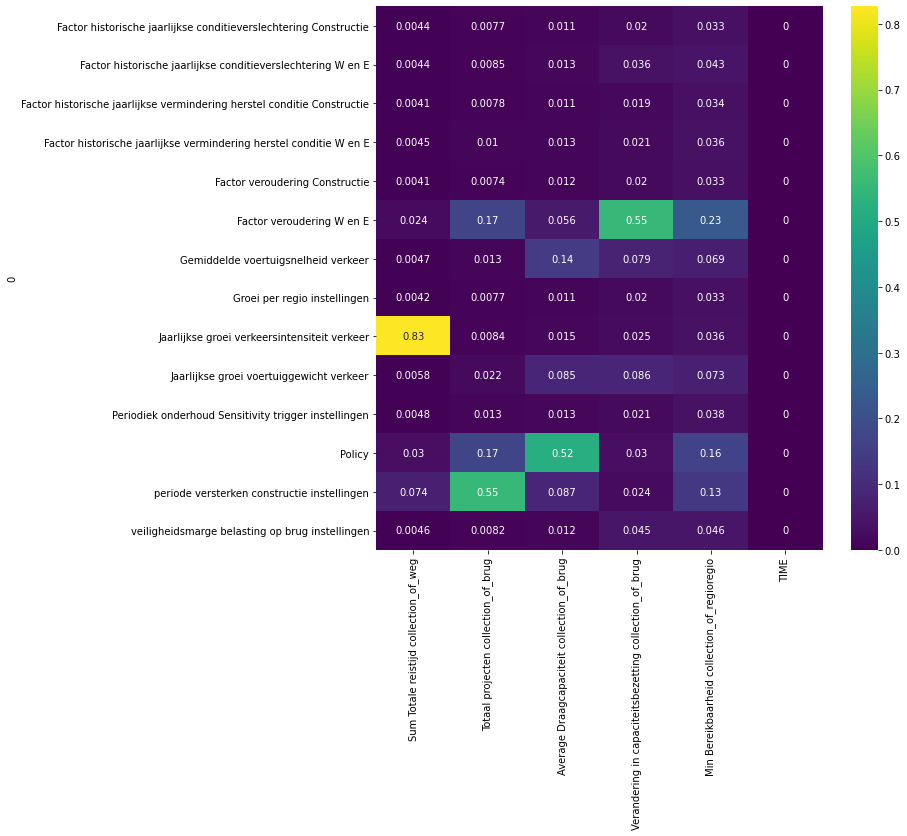

In [28]:
# define xf and yf as experiments and outcomes
xf = x
yf = o

# get feature scores
fs = feature_scoring.get_feature_scores_all(xf, yf)

# create heatmap and set size
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(fs, cmap='viridis', annot=True)

plt.show()

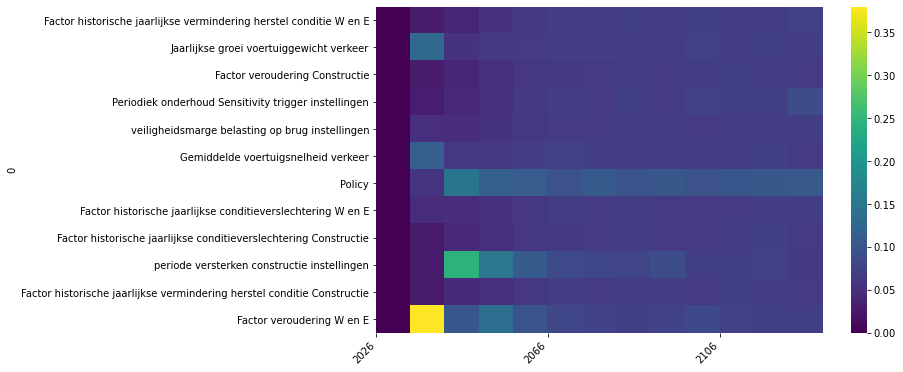

In [252]:
# define y1 as one outcome in the outcomes dictionary
y1 = o['Verandering in capaciteitsbezetting collection_of_brug']
all_scores = []

# Initialize an empty set to store the top 5 features across different time steps
top_5 = set()

# Loop through the columns of the 'y1' array starting from the third column (index 2) with a step size of 8
for i in range(2, y1.shape[1], 8):
    # Extract data from the 'y1' array for the current time step
    data = y1[:, i]

    # Use a function 'get_ex_feature_scores' to calculate feature scores based on regression
    scores = feature_scoring.get_ex_feature_scores(x, data, mode=RuleInductionType.REGRESSION)[0]

    # Add the top five features for this time step to the set of 'top_5'
    top_5 |= set(scores.nlargest(5, 1).index.values)

    # Rename the scores column with the corresponding time step
    scores = scores.rename(columns={1: o['TIME'][0, i]})

    # Append the scores to the list 'all_scores'
    all_scores.append(scores)

# Concatenate all the scores along the columns axis
all_scores = pd.concat(all_scores, axis=1, sort=False)

# Select only the rows corresponding to the top 5 features across different time steps
all_scores = all_scores.loc[top_5, :]

# Create a heatmap using seaborn to visualize the feature scores
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(all_scores, ax=ax, cmap="viridis")

# Display the plot
plt.show()

# Model analyis for extreme value test

In [29]:
# select columns of interest
selected_columns = [
    'Factor historische jaarlijkse conditieverslechtering Constructie',
    'Factor historische jaarlijkse conditieverslechtering W en E',
    'Factor historische jaarlijkse vermindering herstel conditie Constructie',
    'Factor historische jaarlijkse vermindering herstel conditie W en E',
    'Factor veroudering Constructie',
    'Factor veroudering W en E',
    'Groei per regio instellingen',
    'Jaarlijkse groei verkeersintensiteit verkeer',
    'Jaarlijkse groei voertuiggewicht verkeer',
    'veiligheidsmarge belasting op brug instellingen',
    'periode versterken constructie instellingen',
    'forecast average time instellingen',
    'Periodiek onderhoud Sensitivity trigger instellingen',
    'Periodiek versterken Sensitivity trigger instellingen',
    'Policy',
    'scenario',
    'Gemiddelde voertuigsnelheid verkeer'
]

## projects executed

In [30]:
# check instances where the total projects executed at time 2123 = 0
modelbreak = prepared_df[(prepared_df['DateTime'] == 2123) & (prepared_df['Totaal projecten collection_of_brug'] == 0)]
modelbreak

,Run,DateTime,Policy,Entity ID collection_of_brug,Average Draagcapaciteit collection_of_brug,Totaal projecten collection_of_brug,Verandering in capaciteitsbezetting collection_of_brug,Entity ID collection_of_regioregio,Min Bereikbaarheid collection_of_regioregio,Entity ID collection_of_weg,...,Factor historische jaarlijkse vermindering herstel conditie.1 Constructie,Factor veroudering.1 Constructie,Entity ID verkeer,Jaarlijkse groei voertuiggewicht verkeer,Jaarlijkse groei verkeersintensiteit verkeer,Gemiddelde voertuigsnelheid verkeer,initiele voertuiggewicht verkeer,Jaarlijkse groei verkeersintensiteit.1 verkeer,Jaarlijkse groei voertuiggewicht.1 verkeer,scenario
99,1,2123,CTC,collection_of_brug,261640.383972,0,0.0,collection_of_regioregio,1.0,collection_of_weg,...,0.000918,0.864437,verkeer,0.464227,0.317712,82.650965,8,0.317712,0.464227,1
199,2,2123,CTC,collection_of_brug,105481.185115,0,0.0,collection_of_regioregio,1.0,collection_of_weg,...,0.000683,1.037387,verkeer,0.519595,0.351730,74.079450,8,0.351730,0.519595,2
399,4,2123,CTC,collection_of_brug,162355.153038,0,0.0,collection_of_regioregio,1.0,collection_of_weg,...,0.000826,1.206193,verkeer,0.709885,0.349344,87.165655,8,0.349344,0.709885,4
499,5,2123,CTC,collection_of_brug,175492.487943,0,0.0,collection_of_regioregio,1.0,collection_of_weg,...,0.000859,0.970353,verkeer,0.525941,0.334235,90.351667,8,0.334235,0.525941,5
599,6,2123,CTC,collection_of_brug,269002.000187,0,0.0,collection_of_regioregio,1.0,collection_of_weg,...,0.000690,1.130414,verkeer,0.381469,0.268721,69.659417,8,0.268721,0.381469,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999099,4991,2123,NC,collection_of_brug,105378.152997,0,0.0,collection_of_regioregio,1.0,collection_of_weg,...,0.000815,0.945714,verkeer,0.385846,0.331228,86.658571,8,0.331228,0.385846,19991
1999599,4996,2123,NC,collection_of_brug,149090.770858,0,0.0,collection_of_regioregio,1.0,collection_of_weg,...,0.000719,0.892767,verkeer,0.695946,0.338413,82.119323,8,0.338413,0.695946,19996
1999699,4997,2123,NC,collection_of_brug,114422.435235,0,0.0,collection_of_regioregio,1.0,collection_of_weg,...,0.000822,1.167033,verkeer,0.351818,0.303535,65.311808,8,0.303535,0.351818,19997
1999899,4999,2123,NC,collection_of_brug,168307.508443,0,0.0,collection_of_regioregio,1.0,collection_of_weg,...,0.000850,1.195676,verkeer,0.470905,0.339720,64.928872,8,0.339720,0.470905,19999


In [23]:
# check amount of scenarios
unique_scenarios = modelbreak['scenario'].unique()
len(unique_scenarios)

9996

In [31]:
# create subset
modelbreak_subset = modelbreak[selected_columns]
modelbreak_subset

,Factor historische jaarlijkse conditieverslechtering Constructie,Factor historische jaarlijkse conditieverslechtering W en E,Factor historische jaarlijkse vermindering herstel conditie Constructie,Factor historische jaarlijkse vermindering herstel conditie W en E,Factor veroudering Constructie,Factor veroudering W en E,Groei per regio instellingen,Jaarlijkse groei verkeersintensiteit verkeer,Jaarlijkse groei voertuiggewicht verkeer,veiligheidsmarge belasting op brug instellingen,periode versterken constructie instellingen,forecast average time instellingen,Periodiek onderhoud Sensitivity trigger instellingen,Periodiek versterken Sensitivity trigger instellingen,Policy,scenario,Gemiddelde voertuigsnelheid verkeer
99,0.003175,0.005561,0.000918,0.004694,0.864437,1.156298,0.030248,0.317712,0.464227,0.042645,19.301507,8,0.309250,0.953840,CTC,1,82.650965
199,0.003339,0.004386,0.000683,0.005746,1.037387,1.526473,0.044805,0.351730,0.519595,0.059958,25.375733,8,0.149227,0.919572,CTC,2,74.079450
399,0.002413,0.005702,0.000826,0.004802,1.206193,1.336461,0.046819,0.349344,0.709885,0.059869,15.666355,8,0.806680,0.563419,CTC,4,87.165655
499,0.003571,0.004211,0.000859,0.004832,0.970353,1.348026,0.033708,0.334235,0.525941,0.051722,11.969172,8,0.390383,0.855383,CTC,5,90.351667
599,0.003564,0.005454,0.000690,0.004884,1.130414,1.131732,0.044946,0.268721,0.381469,0.059855,27.551766,8,0.168043,0.501154,CTC,6,69.659417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999099,0.002480,0.004150,0.000815,0.004706,0.945714,1.652746,0.036486,0.331228,0.385846,0.056265,20.039888,8,0.971841,0.981108,NC,19991,86.658571
1999599,0.002769,0.005891,0.000719,0.005448,0.892767,1.373768,0.044355,0.338413,0.695946,0.043856,10.177719,8,0.124278,0.846474,NC,19996,82.119323
1999699,0.003435,0.004917,0.000822,0.004203,1.167033,1.526839,0.039190,0.303535,0.351818,0.044416,17.064718,8,0.697105,0.868659,NC,19997,65.311808
1999899,0.003221,0.004206,0.000850,0.004692,1.195676,1.376992,0.034159,0.339720,0.470905,0.051503,15.566408,8,0.474597,0.574833,NC,19999,64.928872


In [32]:
# report standard deviation per column in the subset
for column_name in modelbreak_subset.columns:
    if column_name != 'Policy':
        std_deviation = modelbreak_subset[column_name].std()
        print(f"The standard deviation for column '{column_name}' is: {std_deviation}")

The standard deviation for column 'Factor historische jaarlijkse conditieverslechtering Constructie' is: 0.00034566977021682684
The standard deviation for column 'Factor historische jaarlijkse conditieverslechtering W en E' is: 0.0005690554024431929
The standard deviation for column 'Factor historische jaarlijkse vermindering herstel conditie Constructie' is: 9.353000827433317e-05
The standard deviation for column 'Factor historische jaarlijkse vermindering herstel conditie W en E' is: 0.0005786992698702681
The standard deviation for column 'Factor veroudering Constructie' is: 0.12158096643318053
The standard deviation for column 'Factor veroudering W en E' is: 0.15972361038279947
The standard deviation for column 'Groei per regio instellingen' is: 0.007264480958091165
The standard deviation for column 'Jaarlijkse groei verkeersintensiteit verkeer' is: 0.03451886328861767
The standard deviation for column 'Jaarlijkse groei voertuiggewicht verkeer' is: 0.13072908377745124
The standard d

## average carrying capacity

In [108]:
# check instances where the average carrying capacity is extremely high at time 2123
modelbreak2 = prepared_df[(prepared_df['DateTime'] == 2123) & (prepared_df['Average Draagcapaciteit collection_of_brug'] > 0.1e09)]
modelbreak2

,Run,DateTime,Policy,Entity ID collection_of_brug,Average Draagcapaciteit collection_of_brug,Totaal projecten collection_of_brug,Verandering in capaciteitsbezetting collection_of_brug,Entity ID collection_of_regioregio,Min Bereikbaarheid collection_of_regioregio,Entity ID collection_of_weg,...,Factor historische jaarlijkse vermindering herstel conditie.1 W en E,Factor veroudering.1 W en E,Entity ID verkeer,Jaarlijkse groei voertuiggewicht verkeer,Jaarlijkse groei verkeersintensiteit verkeer,Gemiddelde voertuigsnelheid verkeer,initiele voertuiggewicht verkeer,Jaarlijkse groei verkeersintensiteit.1 verkeer,Jaarlijkse groei voertuiggewicht.1 verkeer,scenario
1903399,4034,2123,NC,collection_of_brug,1.409672e+08,36,0.027778,collection_of_regioregio,1.0,collection_of_weg,...,0.005282,1.150948,verkeer,0.633108,0.267319,96.053970,8,0.267319,0.633108,19034
1999299,4993,2123,NC,collection_of_brug,9.693894e+08,68,0.000000,collection_of_regioregio,1.0,collection_of_weg,...,0.004264,1.673621,verkeer,0.458720,0.244350,99.046169,8,0.244350,0.458720,19993


In [110]:
# create subset
modelbreak_subset2 = modelbreak2[selected_columns]
modelbreak_subset2

,Factor historische jaarlijkse conditieverslechtering Constructie,Factor historische jaarlijkse conditieverslechtering W en E,Factor historische jaarlijkse vermindering herstel conditie Constructie,Factor historische jaarlijkse vermindering herstel conditie W en E,Factor veroudering Constructie,Factor veroudering W en E,Groei per regio instellingen,Jaarlijkse groei verkeersintensiteit verkeer,Jaarlijkse groei voertuiggewicht verkeer,veiligheidsmarge belasting op brug instellingen,periode versterken constructie instellingen,forecast average time instellingen,Policy,scenario
1903399,0.003099,0.004224,0.000793,0.005282,1.054380,1.150948,0.048445,0.267319,0.633108,0.050409,27.129980,1.072419,NC,19034
1999299,0.003315,0.005718,0.000655,0.004264,1.090871,1.673621,0.041909,0.244350,0.458720,0.058072,13.440967,1.002885,NC,19993


In [118]:
# report standard deviation per column for the subset
for column_name in modelbreak_subset2.columns:
    if column_name != 'Policy':
        std_deviation = modelbreak_subset2[column_name].std()
        print(f"The standard deviation for column '{column_name}' is: {std_deviation}")

The standard deviation for column 'Factor historische jaarlijkse conditieverslechtering Constructie' is: 0.00015303659757485982
The standard deviation for column 'Factor historische jaarlijkse conditieverslechtering W en E' is: 0.0010567836698662056
The standard deviation for column 'Factor historische jaarlijkse vermindering herstel conditie Constructie' is: 9.740208818140277e-05
The standard deviation for column 'Factor historische jaarlijkse vermindering herstel conditie W en E' is: 0.000719290847766482
The standard deviation for column 'Factor veroudering Constructie' is: 0.025803315147116982
The standard deviation for column 'Factor veroudering W en E' is: 0.3695854025735538
The standard deviation for column 'Groei per regio instellingen' is: 0.004621936868239622
The standard deviation for column 'Jaarlijkse groei verkeersintensiteit verkeer' is: 0.01624171736961556
The standard deviation for column 'Jaarlijkse groei voertuiggewicht verkeer' is: 0.12331125279373198
The standard de